In [5]:
import numpy as np
import numpy.random as rd
import sys
import matplotlib.pyplot as plt
import time

dataset_num = 200
variance = 0.5
wtflag = 0
learning_rate = 0.001
file_exist = False

batch = 4
epochs = 200


'''dataset_num = 100
variance = 0.5
wtflag = 0
learning_rate = 0.2
file_exist = False

epochs = 500  -> 75%
[[3, 'True', 'relu'],[50, 'True', 'relu'], [50, 'True', 'relu'], [2, 'False', 'sigmoid']]


dataset_num = 80
variance = 0.5
wtflag = 0
learning_rate = 0.5
file_exist = False

epochs = 1200
test = NN(t_x_data, t_y_data, test_x_data, test_y_data, [[2, 'True', 'relu'],[30, 'True', 'relu'],[30, 'True', 'relu'], [30, 'True', 'relu'], [1, 'False', 'sigmoid']], learning_rate=learning_rate)
'''


# making dataset
def making_data_set(d_num):
    d_set = np.empty(1)
    if file_exist:
        tmp = np.load(sys.argv[1])
        d_set = np.append(d_set, tmp)
    else:
        for i in range(int(d_num)):
            b0 = int(rd.randint(0, 2, 1))
            b1 = int(rd.randint(0, 2, 1))
            b2 = int(rd.randint(0, 2, 1))
            
            x = rd.normal(b0*2 - 1, variance)
            y = rd.normal(b1*2 -1, variance)
            z = rd.normal(b2*2-1, variance)
            
            result = b0 + b1 + b2
            
            rb0 = result % 2
            rb1 = int(result/2) % 2
            d_set = np.append(d_set, [[x, y, z, rb0, rb1]])
            '''x = rd.randint(0, 2, 1)
            y = rd.randint(0, 2, 1)
            rst = x | y
            
            d_set = np.append(d_set, [x, y, rst])'''
    d_set = np.delete(d_set, 0, axis=0)
    d_set = d_set.reshape(-1, 5)
    #d_set = d_set.reshape(-1, 3)
    return d_set
t_data = making_data_set(dataset_num)
t_x_data = t_data[:, 0:-2]
t_y_data = t_data[:, -2:].reshape(-1, 2)

test_data = making_data_set(100)
test_x_data = test_data[:, 0:-2]
test_y_data = test_data[:, -2:].reshape(-1, 2)

'''t_data = making_data_set()
t_x_data = t_data[:, 0:-1]
t_y_data = t_data[:, -1].reshape(-1, 1)

test_data = making_data_set()
test_x_data = t_data[:, 0:-1]
test_y_data = t_data[:, -1].reshape(-1, 1)'''


print(f"x test data : \n{test_x_data.shape}\n y test data : \n {test_y_data.shape}\n")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class layer_class:
    def sigmoid(self, a):
        return 1/(1 + np.exp(-a)) 
    def relu(self, b):
        return np.where(b < 0, 0, b)
    def dsigmoid(self, a):
        return a * (1 - a)
    def drelu(self, a):
        return np.where( a<0, 0, 1)
    w = np.array([]); bias = 'False'; ftn = sigmoid; dftn = dsigmoid; b = np.array([]);  dataflow = np.array([]);  delta = np.array([])
    def __init__(self, w, bias='False', activation = 'sigmoid'):
        self.w = w
        if bias == 'True':
            self.bias = 'True'
            self.b = np.zeros((1, w.shape[1]))
        else:
            self.bias = 'False'
        if activation == 'sigmoid':
            self.ftn = self.sigmoid
            self.dftn = self.dsigmoid
        elif activation == 'relu':
            self.ftn = self.relu
            self.dftn = self.drelu






x test data : 
(100, 3)
 y test data : 
 (100, 2)



epochs : 0	 train_loss :0.6824	 test_loss :0.451	 accuracy :49.5%
epochs : 1	 train_loss :0.3639	 test_loss :0.4506	 accuracy :49.5%
epochs : 2	 train_loss :0.3989	 test_loss :0.4506	 accuracy :49.5%
epochs : 3	 train_loss :0.4174	 test_loss :0.4504	 accuracy :49.5%
epochs : 4	 train_loss :0.6345	 test_loss :0.4504	 accuracy :49.5%
epochs : 5	 train_loss :0.3329	 test_loss :0.4499	 accuracy :49.0%
epochs : 6	 train_loss :0.6511	 test_loss :0.4503	 accuracy :49.0%
epochs : 7	 train_loss :0.3725	 test_loss :0.45	 accuracy :49.0%
epochs : 8	 train_loss :0.6411	 test_loss :0.4501	 accuracy :49.0%
epochs : 9	 train_loss :0.3615	 test_loss :0.4497	 accuracy :49.0%
epochs : 10	 train_loss :0.5885	 test_loss :0.4498	 accuracy :49.0%
epochs : 11	 train_loss :0.3503	 test_loss :0.4494	 accuracy :49.0%
epochs : 12	 train_loss :0.5279	 test_loss :0.4494	 accuracy :49.0%
epochs : 13	 train_loss :0.3684	 test_loss :0.4491	 accuracy :49.0%
epochs : 14	 train_loss :0.5488	 test_loss :0.4491	 accuracy 

epochs : 127	 train_loss :0.3764	 test_loss :0.4376	 accuracy :48.5%
epochs : 128	 train_loss :0.3082	 test_loss :0.4374	 accuracy :48.5%
epochs : 129	 train_loss :0.3784	 test_loss :0.4375	 accuracy :48.5%
epochs : 130	 train_loss :0.308	 test_loss :0.4373	 accuracy :48.5%
epochs : 131	 train_loss :0.3797	 test_loss :0.4374	 accuracy :48.5%
epochs : 132	 train_loss :0.3066	 test_loss :0.4372	 accuracy :48.5%
epochs : 133	 train_loss :0.3814	 test_loss :0.4373	 accuracy :48.5%
epochs : 134	 train_loss :0.3059	 test_loss :0.4371	 accuracy :48.5%
epochs : 135	 train_loss :0.3826	 test_loss :0.4372	 accuracy :48.5%
epochs : 136	 train_loss :0.3047	 test_loss :0.437	 accuracy :48.5%
epochs : 137	 train_loss :0.384	 test_loss :0.4371	 accuracy :48.5%
epochs : 138	 train_loss :0.3038	 test_loss :0.4369	 accuracy :48.5%
epochs : 139	 train_loss :0.3851	 test_loss :0.4371	 accuracy :48.5%
epochs : 140	 train_loss :0.3026	 test_loss :0.4369	 accuracy :48.5%
epochs : 141	 train_loss :0.3862	 tes

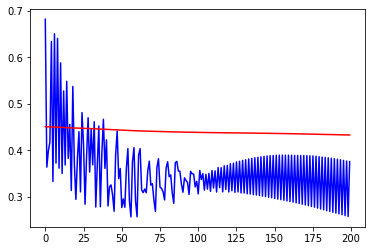

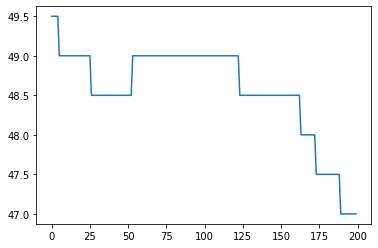

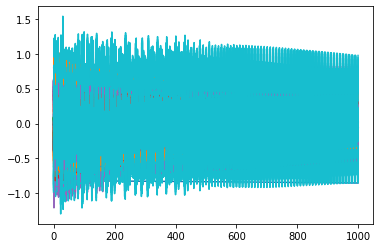

In [6]:
class NN:
    train_set_x, train_set_y, test_set_x, test_set_y, learning_rate, activate = np.array([]), np.array([]), np.array(
        []), np.array([]), 0, 'sigmoid'
    layer, train_loss, test_loss, accuracy = [], [], [], []
    feature = []
    batch = 1
    # 추적
    weight_hist = []
    delta_hist = []
    bias_hist = []

    def __init__(self, train_set_x, train_set_y, test_set_x, test_set_y, feature, learning_rate=0.01,
                 activate='sigmoid', batch=1):
        self.learning_rate = learning_rate
        self.activate = activate
        self.train_set_x = train_set_x
        self.train_set_y = train_set_y
        self.test_set_x = test_set_x
        self.test_set_y = test_set_y
        self.feature = feature
        self.batch = batch
        # w initialization sigmoid use xavier initialization  Relu using He initialization
        for i, f in enumerate(self.feature):
            if i == (len(self.feature) - 1):
                break
            w = 0
            if f[2] is 'sigmoid':
                w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(1 / (f[0] + self.feature[i + 1][0]))
            elif f[2] is 'relu':
                w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(2 / (f[0] + self.feature[i + 1][0]))
            self.layer.append(layer_class(w, f[1], f[2]))

    # forwarding
    def pri(self):
        '''for i in self.layer:
            print(i.w)'''
        print("data predict : \n", self.layer[-1].dataflow)

    def forwarding(self, x_data, y_data):
        for i, k in enumerate(self.layer):
            a = np.array([])
            if i is 0:
                a = np.append(a, np.dot(x_data, k.w))
            else:
                a = np.append(a, np.dot(self.layer[i - 1].dataflow, k.w))

            a = a.reshape(x_data.shape[0], k.w.shape[1])

            if k.bias == 'True':
                # print(f"ones : {type(np.ones(1))}  bias : {type(k.b)}")
                a = np.multiply(np.ones((int(x_data.shape[0]), int(k.w.shape[1]))), k.b) + a
                # print(a)

            k.dataflow = k.ftn(a)
        # print(f"predic output : {self.layer[-1].dataflow.shape}\n data output : {y_data.shape}")

    def backpropagation(self, x_data, y_data):
        for i, L in reversed(list(enumerate(self.layer))):
            '''summation {}{j} wij delatj 교재 slide 12p'''
            # fully connected layer
            L.before_w = L.w
            if i is (len(self.layer) - 1):
                L.delta = np.multiply((y_data - L.dataflow), L.dftn(L.dataflow))
                # print(f"$$$$$$$$$i :{i}, L.dataflow : {L.dataflow.shape} L.delta : {L.delta.shape}, L.w : {L.w.shape}")
            # else
            else:
                back_L = self.layer[i + 1]
                L.delta = np.multiply(L.dftn(L.dataflow), np.dot(back_L.delta, back_L.before_w.T))
                # print(f"L.delta 구하는 과정\n\ni :{i}, L.dataflow : {L.dataflow.shape} back_L.delta : {back_L.delta.shape}, back_L.w : {back_L.w.shape}, L.w. : {L.w.shape}\n 구하기 end \n\n")

            # i가 0 이면 input data가 train_set
            if i is 0:
                input = x_data
            else:
                input = self.layer[i - 1].dataflow

            '''x_k * delta -> upgrade할 weight '''
            upgrade_w = np.zeros(1)
            # outer로 한꺼번에 추가후에, reshape로 정렬
            for k in range(L.delta.shape[0]):
                upgrade_w = np.append(upgrade_w, np.outer(input[k], L.delta[k]))
                # print(f" for {i} layer **********************\ndelta : \n{L.delta[k]}\n input : \n{input[k]}\n result : \n{np.outer(input[k], L.delta[k])}")
            upgrade_w = np.delete(upgrade_w, 0, axis=0)
            upgrade_w = upgrade_w.reshape(-1, L.w.shape[0], L.w.shape[1])

            if i == 0:
                self.weight_hist.append(L.w.reshape(-1))
                self.delta_hist.append(L.delta.reshape(-1))
                if L.bias is "True":
                    self.bias_hist.append(L.b.reshape(-1))

            """weight update"""
            if L.bias == 'True':
                L.b = L.b + np.average(L.delta, axis=0)

            """update weight"""
            L.w = L.w + np.average(upgrade_w, axis=0) * self.learning_rate

    def training(self, epochs):
        for i in range(epochs):
            for j in range(self.batch):
                x_data = self.train_set_x[
                         int(len(self.train_set_x) / self.batch) * j: int(len(self.train_set_x) / self.batch) * (j + 1),
                         :]
                y_data = self.train_set_y[
                         int(len(self.train_set_y) / self.batch) * j: int(len(self.train_set_y) / self.batch) * (j + 1),
                         :]
                self.forwarding(x_data, y_data)
                self.backpropagation(x_data, y_data)
            self.test(self.test_set_x, self.test_set_y)

            # print(f"bias : {self.layer[0].b}")
            print(
                f"epochs : {i}\t train_loss :{self.train_loss[i]:.4}\t test_loss :{self.test_loss[i]:.4}\t accuracy :{self.accuracy[i]:}%")

    def plot(self):

        plt.figure()
        plt.plot(self.train_loss, 'b')
        plt.plot(self.test_loss, 'r')
        plt.show()

        plt.figure()
        plt.plot(self.accuracy)
        plt.show()

        plt.figure()
        plt.plot(self.weight_hist)
        plt.plot(self.delta_hist)
        plt.show()

        '''plt.figure()
        plt.plot(self.bias_hist)
        plt.show()'''

    def test(self, x_data, y_data):
        self.train_loss = np.append(self.train_loss, \
                                    np.average((self.layer[-1].dataflow - \
                                                self.train_set_y[-int(len(self.train_set_y) / self.batch):, :]) ** 2))
        for i, k in enumerate(self.layer):
            a = np.array([])
            if i is 0:
                a = np.append(a, np.dot(x_data, k.w))
            else:
                a = np.append(a, np.dot(self.layer[i - 1].dataflow, k.w))

            a = a.reshape(self.test_set_x.shape[0], k.w.shape[1])
            # print(a.shape)
            k.dataflow = k.ftn(a)
        self.test_loss = np.append(self.test_loss, np.average((self.layer[-1].dataflow - y_data) ** 2))

        # print(self.layer[-1].dataflow)
        # result = np.array([self.layer[-1].dataflow > 0.5])
        result = np.array([self.layer[-1].dataflow > 0.5])
        cnt = np.equal(self.test_set_y, result)
        # print(f"ny_data : \n{self.test_set_y}\n\n y^ : \n{self.layer[-1].dataflow}")
        correct = np.average(cnt) * 100
        self.accuracy.append(correct)


test = NN(t_x_data, t_y_data, test_x_data, test_y_data, \
          [[3, 'True', 'relu'], [10, 'True', 'relu'], [10, 'True', 'relu'],[10, 'True', 'relu'],\
           [2, 'False', 'sigmoid']], \
          learning_rate=learning_rate, batch=5)

start_time = time.time()
test.training(epochs)
end_time = time.time()
test.pri()

print(f" excutive time : {end_time - start_time}")
test.plot()

In [108]:
a = np.array(range(10)).reshape(5, -1)

In [111]:
b = a[0:4 , :]

In [112]:
b

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])